<a href="https://colab.research.google.com/github/Vicheka6363/Vicheka_ITE_G8A_PP/blob/main/TrainingProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[Link for download data set(https://www.kaggle.com/datasets/moltean/fruits)]

#Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruits-360-original-size/Training',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6240 files belonging to 24 classes.


Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruits-360-original-size/Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3116 files belonging to 24 classes.


#Building Model

In [5]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=24,activation='softmax'))

#Compilling and Training Phase

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
195/195 [==============================] - 949s 5s/step - loss: 3.0228 - accuracy: 0.5808 - val_loss: 0.3028 - val_accuracy: 0.8973
Epoch 2/30
195/195 [==============================] - 115s 589ms/step - loss: 0.2658 - accuracy: 0.9136 - val_loss: 0.1517 - val_accuracy: 0.9451
Epoch 3/30
195/195 [==============================] - 109s 555ms/step - loss: 0.1631 - accuracy: 0.9441 - val_loss: 0.0625 - val_accuracy: 0.9811
Epoch 4/30
195/195 [==============================] - 111s 565ms/step - loss: 0.0807 - accuracy: 0.9758 - val_loss: 0.0153 - val_accuracy: 0.9968
Epoch 5/30
195/195 [==============================] - 110s 558ms/step - loss: 0.0818 - accuracy: 0.9760 - val_loss: 0.0051 - val_accuracy: 0.9984
Epoch 6/30
195/195 [==============================] - 117s 600ms/step - loss: 0.0961 - accuracy: 0.9720 - val_loss: 0.0174 - val_accuracy: 0.9984
Epoch 7/30
195/195 [==============================] - 109s 554ms/step - loss: 0.0966 - accuracy: 0.9705 - val_loss: 0.0085 - va

#Saving Model

In [17]:
cnn.save('trained_model.h5')  ## we save train model in to h5 file structure

recording history of trained data

In [18]:
training_history.history

{'loss': [3.0227949619293213,
  0.2657555043697357,
  0.1631268560886383,
  0.08071769028902054,
  0.0817774161696434,
  0.09613408893346786,
  0.09659003466367722,
  0.0394638292491436,
  0.03138561546802521,
  0.029232606291770935,
  0.08937470614910126,
  0.05927885323762894,
  0.03775189816951752,
  0.021570000797510147,
  0.046870626509189606,
  0.02904672548174858,
  0.005997863132506609,
  0.0029374214354902506,
  0.09529994428157806,
  0.04349243640899658,
  0.07594375312328339,
  0.03537397459149361,
  0.030260635539889336,
  0.011291777715086937,
  0.09172985702753067,
  0.025119967758655548,
  0.0454278402030468,
  0.03768927603960037,
  0.013601497747004032,
  0.024714626371860504],
 'accuracy': [0.5807692408561707,
  0.9136217832565308,
  0.9440705180168152,
  0.9758012890815735,
  0.9759615659713745,
  0.9719551205635071,
  0.9705128073692322,
  0.9881410002708435,
  0.9910256266593933,
  0.9908654093742371,
  0.9766025543212891,
  0.9854166507720947,
  0.9889423251152039

In [19]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [20]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Calculating Accuracy of Model Achieved on Validation set

In [21]:
training_history.history['val_accuracy']

[0.8973042368888855,
 0.9451219439506531,
 0.9810654520988464,
 0.9967907667160034,
 0.9983953833580017,
 0.9983953833580017,
 0.9990372061729431,
 0.9987162947654724,
 1.0,
 1.0,
 0.998074471950531,
 0.9996790885925293,
 1.0,
 0.9971116781234741,
 0.990693211555481,
 0.9990372061729431,
 1.0,
 1.0,
 0.9996790885925293,
 0.9939024448394775,
 0.9996790885925293,
 1.0,
 0.9993581771850586,
 1.0,
 1.0,
 0.9884467124938965,
 0.9996790885925293,
 1.0,
 0.9948652386665344,
 1.0]

In [24]:
# print the last one of the accuracy
print("Validation set Accuracy: {} ".format(training_history.history['val_accuracy'][-1]))

Validation set Accuracy: 1.0 


In [23]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 100.0 %


#Accuracy Visualization

Training Visualization

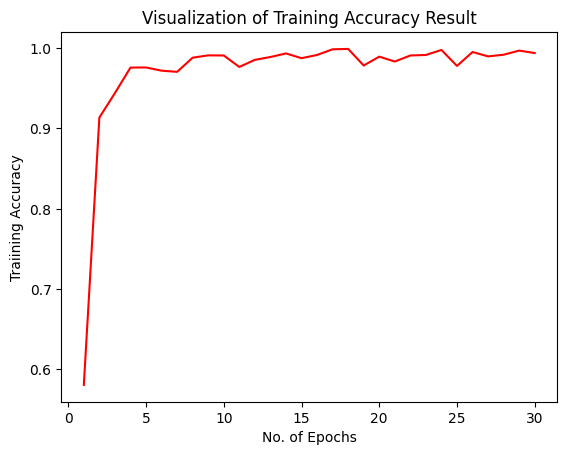

In [26]:
#training_history.history['accuracy']
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy

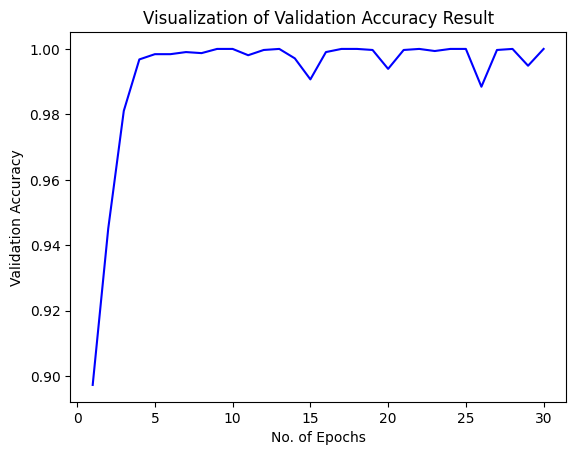

In [27]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Evaluating Model

Training set Accuracy

In [28]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

195/195 [==============================] - 30s 149ms/step - loss: 2.0738e-05 - accuracy: 1.0000
Training accuracy: 1.0


Validation set Accuracy

In [29]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

98/98 [==============================] - 15s 144ms/step - loss: 2.4550e-05 - accuracy: 1.0000
Validation accuracy: 1.0


#Reference

Loading image(https://keras.io/api/data_loading/image/)

Keras API:(https://keras.io/api/)

YouTube Video:(https://colab.research.google.com/drive/17kETWVFmRHi51eqZrrzhT1abUrjaH_VW#scrollTo=CKojr1SV-X76&line=1&uniqifier=1)